## クラス不均衡への対処

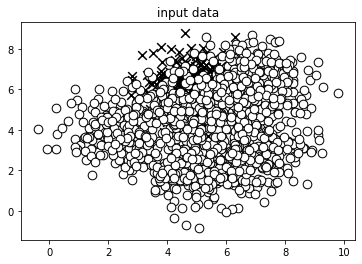

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.ensemble import ExtraTreesClassifier

%matplotlib inline
%run utilities.ipynb

# ファイルを読み込む
input_file = './data/data_imbalance.txt'
data = np.loadtxt(input_file, delimiter=',')

# Xは最終列までの値、yは最終列
X, y = data[:, :-1], data[:, -1]

# yのラベル地に基づいてclass_0とclass_1で分ける
class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])

# グラフの箱を作る
plt.figure()

# ラベルが0のものはxで表示する。
# s：マーカーのサイズ、facecolor：マーカーの塗り潰し色、edgecolors：マーカーの境界色
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolor='black', edgecolors='black', linewidths=1, marker='x')

# ラベルが1のものはoで表示する。
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolor='white', edgecolors='black', linewidths=1, marker='o')

plt.title("input data")
plt.show()

○の方がxより圧倒的に多いデータセットになっている。  
これが**データの不均衡**  
  
これをこのまま扱ってみる

x_vals: [[-1.08 -1.07 -1.06 ... 10.09 10.1  10.11]
 [-1.08 -1.07 -1.06 ... 10.09 10.1  10.11]
 [-1.08 -1.07 -1.06 ... 10.09 10.1  10.11]
 ...
 [-1.08 -1.07 -1.06 ... 10.09 10.1  10.11]
 [-1.08 -1.07 -1.06 ... 10.09 10.1  10.11]
 [-1.08 -1.07 -1.06 ... 10.09 10.1  10.11]]
y_vals: [[-1.82 -1.82 -1.82 ... -1.82 -1.82 -1.82]
 [-1.81 -1.81 -1.81 ... -1.81 -1.81 -1.81]
 [-1.8  -1.8  -1.8  ... -1.8  -1.8  -1.8 ]
 ...
 [ 9.76  9.76  9.76 ...  9.76  9.76  9.76]
 [ 9.77  9.77  9.77 ...  9.77  9.77  9.77]
 [ 9.78  9.78  9.78 ...  9.78  9.78  9.78]]
x_vals.ravels: [-1.08 -1.07 -1.06 ... 10.09 10.1  10.11]
y_vals.ravels: [-1.82 -1.82 -1.82 ...  9.78  9.78  9.78]
[1. 1. 1. ... 1. 1. 1.]
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


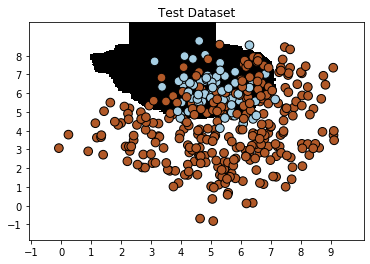

In [8]:
# 訓練用データを75%、テスト用データは25%
# random_stateは結果に再現性を求める時に指定すると良い。
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=1)

# n_estimatorsは構築する決定木の数、max_depthは決定木の深さ
params = {'n_estimators': 100, 'random_state': 0, 'max_depth': 4,
         'class_weight': 'balanced'
         }
classifier = ExtraTreesClassifier(**params)

# 訓練
classifier.fit(X_train, y_train)

# 訓練された決定木にテスト用データを当てはめた場合、適切に分類されるか見る
visualize_classifier(classifier, X_test, y_test, 'Test Dataset')

In [9]:
# テスト用データでラベルを予測する
y_test_pred = classifier.predict(X_test)

class_names = ['Class_0', 'Class_1']
print("Classifier performance on test dataset\n")
print(classification_report(y_test, y_test_pred, target_names=class_names))

Classifier performance on test dataset

              precision    recall  f1-score   support

     Class_0       0.46      0.89      0.60        73
     Class_1       0.97      0.75      0.84       302

    accuracy                           0.77       375
   macro avg       0.71      0.82      0.72       375
weighted avg       0.87      0.77      0.80       375



```
params = {'n_estimators': 100, 'random_state': 0, 'max_depth': 4,
         'class_weight': 'balanced'
         }
```

class_weightを指定しないと、Class_0にはまるような値を算出できないので、エラーが表示されてしまう 

```
/Users/tryoutlab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
```